# Importing packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

In [4]:
from sklearn import svm

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Reading the CSV file (Importing the Data set)

In [6]:
df = pd.read_csv('Lead.csv')
df.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,8,11,12,18,27,28,35,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TCNo,NIC,Name,ContactNo,BSPCode,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,...,CalMethod,NewRate,RateDeference,FacilityAmountOP,GrossAmountOP,DisbursementNo,SysDateChange,HighRate,LumSumAmount,Status
0,MT0000000001,NaN,NaN,NaN,IN02606167,M,0.0,N,31,700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,MT0000000002,NaN,NaN,NaN,IN02807892,M,0.0,N,31,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,MT0000000003,NaN,NaN,NaN,IN02641968,M,0.0,N,31,800000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,MT0000000004,NaN,NaN,NaN,IN02606168,M,0.0,N,31,7000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,MT0000000005,NaN,NaN,NaN,IN02089303,M,0.0,N,31,300000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Preliminary Analysis and Data Preprocessing

In [7]:
df.groupby('Status').size() #Count of the two Categories

Status
0    292058
1    583137
dtype: int64

In [8]:
# Inspecting the type of variables in pandas
df.dtypes

TCNo                            object
NIC                             object
Name                            object
ContactNo                       object
BSPCode                         object
FacilityType                    object
VATRegistered                  float64
SchemType                       object
EquipmentCode                   object
UnitPrice                      float64
NoOfEquipments                 float64
Period                          object
Rentals                         object
ResidualType                    object
ResidualAmount                 float64
PrePayType                      object
Prepayment                     float64
Rate                           float64
RTCode                          object
NetAmount                      float64
Tax                            float64
GrossAmount                    float64
FacilityAmount                 float64
NetRental                      float64
TaxRental                      float64
GrossRental              

In [9]:
# finding categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 19 categorical variables


In [10]:
# finding numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 26 numerical variables


In [11]:
# view of categorical variables
df[categorical].head()

,TCNo,NIC,Name,ContactNo,BSPCode,FacilityType,SchemType,EquipmentCode,Period,Rentals,ResidualType,PrePayType,RTCode,NetRecievable,FlatRate,UserID,SysDate,CalMethod,SysDateChange
0,MT0000000001,NaN,NaN,NaN,IN02606167,M,N,31,36,0,N,R,1,1154268,21.6318,37EEC5C4-DB77-4190-80EC-1700475D3A16,43:16.1,NaN,NaN
1,MT0000000002,NaN,NaN,NaN,IN02807892,M,N,31,48,0,N,R,1,195888,23.972,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,46:33.1,NaN,NaN
2,MT0000000003,NaN,NaN,NaN,IN02641968,M,N,31,48,0,N,R,1,1427664,19.6145,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,56:01.8,NaN,NaN
3,MT0000000004,NaN,NaN,NaN,IN02606168,M,N,31,48,0,N,R,1,13298160,22.4934,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,33:46.4,NaN,NaN
4,MT0000000005,NaN,NaN,NaN,IN02089303,M,N,31,36,0,N,R,1,494712,21.6347,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,00:09.8,NaN,NaN


In [12]:
# view of numerical variables
df[numerical].head()

,VATRegistered,UnitPrice,NoOfEquipments,ResidualAmount,Prepayment,Rate,NetAmount,Tax,GrossAmount,FacilityAmount,...,ClamableTax2,FacilityAmountWithAddCharge,NewRate,RateDeference,FacilityAmountOP,GrossAmountOP,DisbursementNo,HighRate,LumSumAmount,Status
0,0.0,700000.0,1.0,0.0,0.0,36.0,700000.0,0.0,700000.0,700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.0,100000.0,1.0,0.0,0.0,38.0,100000.0,0.0,100000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.0,800000.0,1.0,0.0,0.0,32.0,800000.0,0.0,800000.0,800000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.0,7000000.0,1.0,0.0,0.0,36.0,7000000.0,0.0,7000000.0,7000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0.0,300000.0,1.0,0.0,0.0,36.0,300000.0,0.0,300000.0,300000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Missing Values

In [13]:
df.isnull().sum() #Count of the null values present in each variable

TCNo                               11
NIC                            421617
Name                           432645
ContactNo                      410419
BSPCode                           139
FacilityType                       61
VATRegistered                      61
SchemType                          61
EquipmentCode                      61
UnitPrice                          61
NoOfEquipments                     61
Period                             61
Rentals                            61
ResidualType                    23102
ResidualAmount                  23102
PrePayType                      23102
Prepayment                         61
Rate                               61
RTCode                             61
NetAmount                          61
Tax                                61
GrossAmount                        61
FacilityAmount                     61
NetRental                       23102
TaxRental                       23102
GrossRental                     23102
DownPayment 

In [14]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

TCNo 0.0  % missing values
NIC 0.4817  % missing values
Name 0.4943  % missing values
ContactNo 0.4689  % missing values
BSPCode 0.0002  % missing values
FacilityType 0.0001  % missing values
VATRegistered 0.0001  % missing values
SchemType 0.0001  % missing values
EquipmentCode 0.0001  % missing values
UnitPrice 0.0001  % missing values
NoOfEquipments 0.0001  % missing values
Period 0.0001  % missing values
Rentals 0.0001  % missing values
ResidualType 0.0264  % missing values
ResidualAmount 0.0264  % missing values
PrePayType 0.0264  % missing values
Prepayment 0.0001  % missing values
Rate 0.0001  % missing values
RTCode 0.0001  % missing values
NetAmount 0.0001  % missing values
Tax 0.0001  % missing values
GrossAmount 0.0001  % missing values
FacilityAmount 0.0001  % missing values
NetRental 0.0264  % missing values
TaxRental 0.0264  % missing values
GrossRental 0.0264  % missing values
DownPayment 0.0264  % missing values
NetRecievable 0.0264  % missing values
FlatRate 0.0264  % 

In [15]:
dfNULL= (df.isnull().mean())*100   #Number of null values as a percentage for each variable
dfNULL

TCNo                             0.001257
NIC                             48.174064
Name                            49.434126
ContactNo                       46.894578
BSPCode                          0.015882
FacilityType                     0.006970
VATRegistered                    0.006970
SchemType                        0.006970
EquipmentCode                    0.006970
UnitPrice                        0.006970
NoOfEquipments                   0.006970
Period                           0.006970
Rentals                          0.006970
ResidualType                     2.639640
ResidualAmount                   2.639640
PrePayType                       2.639640
Prepayment                       0.006970
Rate                             0.006970
RTCode                           0.006970
NetAmount                        0.006970
Tax                              0.006970
GrossAmount                      0.006970
FacilityAmount                   0.006970
NetRental                        2

In [16]:
del df['TCNo']
del df['NIC'] 
del df['Name']
del df['ContactNo']
del df['BSPCode']
del df['ClamableTax2']
del df['FacilityAmountWithAddCharge']
del df['CalMethod']
del df['NewRate']
del df['RateDeference']
del df['FacilityAmountOP']
del df['GrossAmountOP']
del df['DisbursementNo']
del df['SysDateChange']
del df['HighRate']
del df['LumSumAmount']
df.head()

,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Period,Rentals,ResidualType,ResidualAmount,...,TaxRental,GrossRental,DownPayment,NetRecievable,FlatRate,UserID,SysDate,SupVat,ClamableTax,Status
0,M,0.0,N,31,700000.0,1.0,36,0,N,0.0,...,0.0,32063.0,0.0,1154268,21.6318,37EEC5C4-DB77-4190-80EC-1700475D3A16,43:16.1,0.0,0.0,1
1,M,0.0,N,31,100000.0,1.0,48,0,N,0.0,...,0.0,4081.0,0.0,195888,23.972,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,46:33.1,0.0,0.0,1
2,M,0.0,N,31,800000.0,1.0,48,0,N,0.0,...,0.0,29743.0,0.0,1427664,19.6145,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,56:01.8,0.0,0.0,1
3,M,0.0,N,31,7000000.0,1.0,48,0,N,0.0,...,0.0,277045.0,0.0,13298160,22.4934,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,33:46.4,0.0,0.0,1
4,M,0.0,N,31,300000.0,1.0,36,0,N,0.0,...,0.0,13742.0,0.0,494712,21.6347,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,00:09.8,0.0,0.0,1


In [17]:
df.isnull().sum() #NUll value count after the variables with more than 50% null percentage and unique identifiers deleted from the table

FacilityType         61
VATRegistered        61
SchemType            61
EquipmentCode        61
UnitPrice            61
NoOfEquipments       61
Period               61
Rentals              61
ResidualType      23102
ResidualAmount    23102
PrePayType        23102
Prepayment           61
Rate                 61
RTCode               61
NetAmount            61
Tax                  61
GrossAmount          61
FacilityAmount       61
NetRental         23102
TaxRental         23102
GrossRental       23102
DownPayment       23102
NetRecievable     23102
FlatRate          23102
UserID               61
SysDate              61
SupVat              110
ClamableTax         224
Status                0
dtype: int64

In [18]:
df2=df.dropna() # dropping the null values since there is no significant effect by imputing the null values comprared to the total number of data
df2.head()

,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Period,Rentals,ResidualType,ResidualAmount,...,TaxRental,GrossRental,DownPayment,NetRecievable,FlatRate,UserID,SysDate,SupVat,ClamableTax,Status
0,M,0.0,N,31,700000.0,1.0,36,0,N,0.0,...,0.0,32063.0,0.0,1154268,21.6318,37EEC5C4-DB77-4190-80EC-1700475D3A16,43:16.1,0.0,0.0,1
1,M,0.0,N,31,100000.0,1.0,48,0,N,0.0,...,0.0,4081.0,0.0,195888,23.972,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,46:33.1,0.0,0.0,1
2,M,0.0,N,31,800000.0,1.0,48,0,N,0.0,...,0.0,29743.0,0.0,1427664,19.6145,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,56:01.8,0.0,0.0,1
3,M,0.0,N,31,7000000.0,1.0,48,0,N,0.0,...,0.0,277045.0,0.0,13298160,22.4934,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,33:46.4,0.0,0.0,1
4,M,0.0,N,31,300000.0,1.0,36,0,N,0.0,...,0.0,13742.0,0.0,494712,21.6347,FB5669FC-D123-4F6F-BC0D-4C76EB24A4A3,00:09.8,0.0,0.0,1


In [19]:
df2.shape

(851930, 29)

In [20]:
# finding categorical variables for the new data set after removing missing values
categorical = [var for var in df2.columns if df2[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))


# finding numerical variables
numerical = [var for var in df2.columns if df2[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 categorical variables
There are 17 numerical variables


In [21]:
numerical = [var for var in numerical if var not in['Status']]
numerical
#Selecting the numerical variables except the dependent binary variable

['VATRegistered',
 'UnitPrice',
 'NoOfEquipments',
 'ResidualAmount',
 'Prepayment',
 'Rate',
 'NetAmount',
 'Tax',
 'GrossAmount',
 'FacilityAmount',
 'NetRental',
 'TaxRental',
 'GrossRental',
 'DownPayment',
 'SupVat',
 'ClamableTax']

# Outliers

Text(0, 0.5, 'ClamableTax')

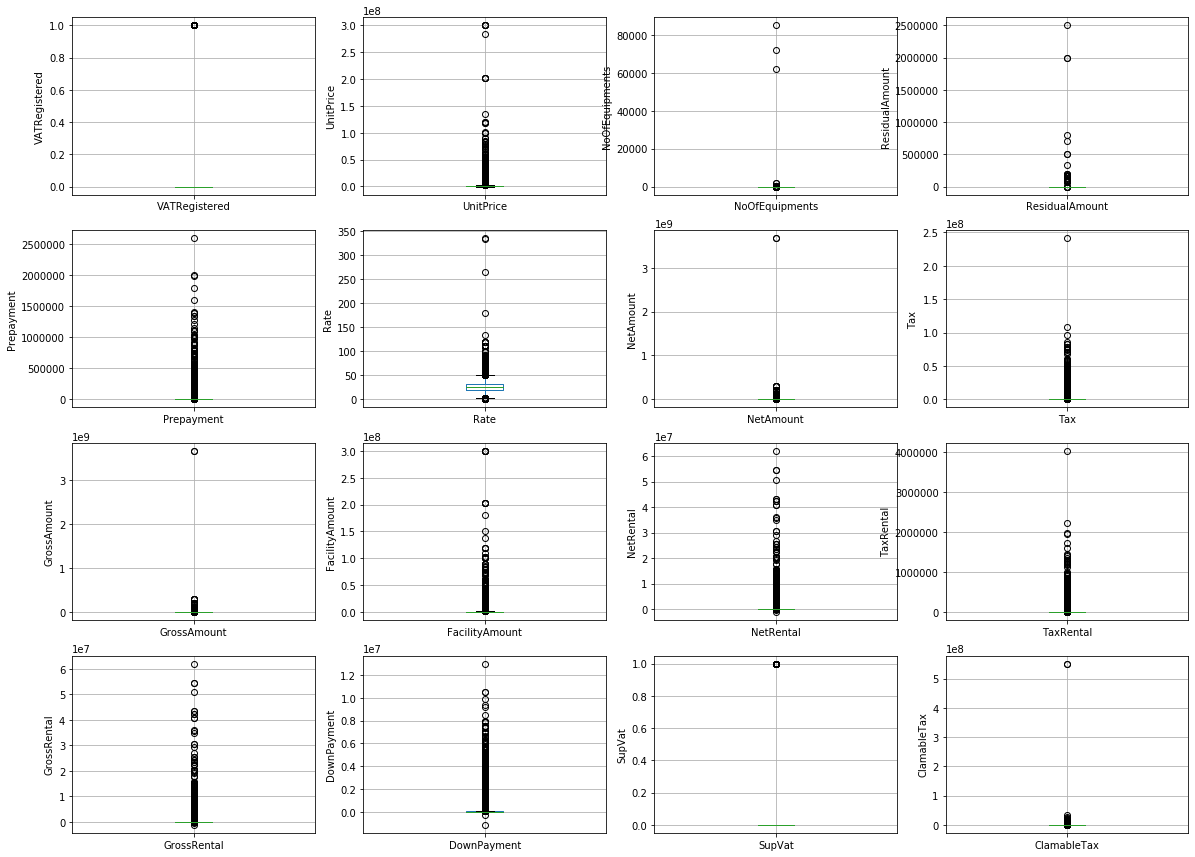

In [22]:
# let's make boxplots to visualise outliers in the continuous variables 


plt.figure(figsize=(20,15))
plt.subplot(4, 4, 1)
fig = df2.boxplot(column='VATRegistered')
fig.set_title('')
fig.set_ylabel('VATRegistered')


plt.subplot(4, 4, 2)
fig = df2.boxplot(column='UnitPrice')
fig.set_title('')
fig.set_ylabel('UnitPrice')

plt.subplot(4, 4, 3)
fig = df2.boxplot(column='NoOfEquipments')
fig.set_title('')
fig.set_ylabel('NoOfEquipments')

plt.subplot(4, 4, 4)
fig = df2.boxplot(column='ResidualAmount')
fig.set_title('')
fig.set_ylabel('ResidualAmount')


plt.subplot(4, 4, 5)
fig = df2.boxplot(column='Prepayment')
fig.set_title('')
fig.set_ylabel('Prepayment')

plt.subplot(4, 4, 6)
fig = df2.boxplot(column='Rate')
fig.set_title('')
fig.set_ylabel('Rate')

plt.subplot(4, 4, 7)
fig = df2.boxplot(column='NetAmount')
fig.set_title('')
fig.set_ylabel('NetAmount')

plt.subplot(4, 4, 8)
fig = df2.boxplot(column='Tax')
fig.set_title('')
fig.set_ylabel('Tax')

plt.subplot(4, 4, 9)
fig = df2.boxplot(column='GrossAmount')
fig.set_title('')
fig.set_ylabel('GrossAmount')


plt.subplot(4, 4, 10)
fig = df2.boxplot(column='FacilityAmount')
fig.set_title('')
fig.set_ylabel('FacilityAmount')

plt.subplot(4, 4, 11)
fig = df2.boxplot(column='NetRental')
fig.set_title('')
fig.set_ylabel('NetRental')

plt.subplot(4, 4, 12)
fig = df2.boxplot(column='TaxRental')
fig.set_title('')
fig.set_ylabel('TaxRental')

plt.subplot(4, 4, 13)
fig = df2.boxplot(column='GrossRental')
fig.set_title('')
fig.set_ylabel('GrossRental')
                 
plt.subplot(4, 4, 14)
fig = df2.boxplot(column='DownPayment')
fig.set_title('')
fig.set_ylabel('DownPayment')

plt.subplot(4, 4, 15)
fig = df2.boxplot(column='SupVat')
fig.set_title('')
fig.set_ylabel('SupVat')
                 
plt.subplot(4, 4, 16)
fig = df2.boxplot(column='ClamableTax')
fig.set_title('')
fig.set_ylabel('ClamableTax')


Text(0.5, 0, 'ClamableTax')

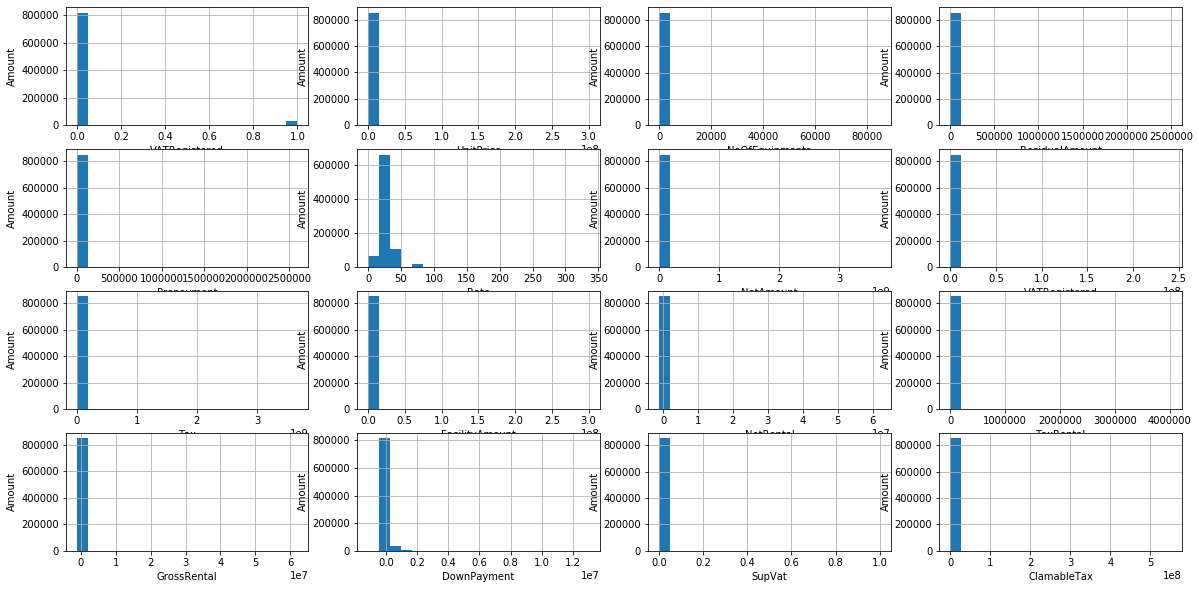

In [23]:

# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(20,10))
plt.subplot(4, 4, 1)
fig = df2.VATRegistered.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('VATRegistered')

plt.subplot(4, 4, 2)
fig = df2.UnitPrice.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('UnitPrice')

plt.subplot(4, 4, 3)
fig = df2.NoOfEquipments.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('NoOfEquipments')

plt.subplot(4, 4, 4)
fig = df2.ResidualAmount.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('ResidualAmount')


plt.subplot(4, 4, 5)
fig = df2.Prepayment.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('Prepayment')

plt.subplot(4, 4, 6)
fig = df2.Rate.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('Rate')

plt.subplot(4, 4, 7)
fig = df2.NetAmount.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('NetAmount')

plt.subplot(4, 4, 8)
fig = df2.Tax.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('VATRegistered')

plt.subplot(4, 4, 9)
fig = df2.GrossAmount.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('Tax')


plt.subplot(4, 4, 10)
fig = df2.FacilityAmount.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('FacilityAmount')

plt.subplot(4, 4, 11)
fig = df2.NetRental.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('NetRental')

plt.subplot(4, 4, 12)
fig = df2.TaxRental.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('TaxRental')

plt.subplot(4, 4, 13)
fig = df2.GrossRental.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('GrossRental')
                 
plt.subplot(4, 4, 14)
fig = df2.DownPayment.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('DownPayment')

plt.subplot(4, 4, 15)
fig = df2.SupVat.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('SupVat')
                 
plt.subplot(4, 4, 16)
fig = df2.ClamableTax.hist(bins=20)
fig.set_ylabel('Amount')
fig.set_xlabel('ClamableTax')

# Dealing with outliers

In [24]:
IQR = df2.VATRegistered.quantile(0.75) - df2.VATRegistered.quantile(0.25)
Lower_fence = df2.VATRegistered.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.VATRegistered.quantile(0.75) + (IQR * 1.5)
print('VATRegistered outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.UnitPrice.quantile(0.75) - df2.UnitPrice.quantile(0.25)
Lower_fence = df2.UnitPrice.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.UnitPrice.quantile(0.75) + (IQR * 1.5)
print('UnitPrice outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.NoOfEquipments.quantile(0.75) - df2.NoOfEquipments.quantile(0.25)
Lower_fence = df2.NoOfEquipments.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.NoOfEquipments.quantile(0.75) + (IQR * 1.5)
print('NoOfEquipments outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.ResidualAmount.quantile(0.75) - df2.ResidualAmount.quantile(0.25)
Lower_fence = df2.ResidualAmount.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.ResidualAmount.quantile(0.75) + (IQR * 1.5)
print('ResidualAmount outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.Prepayment.quantile(0.75) - df2.Prepayment.quantile(0.25)
Lower_fence = df2.Prepayment.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.Prepayment.quantile(0.75) + (IQR * 1.5)
print('Prepayment outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.Rate.quantile(0.75) - df2.Rate.quantile(0.25)
Lower_fence = df2.Rate.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.Rate.quantile(0.75) + (IQR * 1.5)
print('Rate outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.NetAmount.quantile(0.75) - df2.NetAmount.quantile(0.25)
Lower_fence = df2.NetAmount.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.NetAmount.quantile(0.75) + (IQR * 1.5)
print('NetAmount outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.Tax.quantile(0.75) - df2.Tax.quantile(0.25)
Lower_fence = df2.Tax.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.Tax.quantile(0.75) + (IQR * 1.5)
print('Tax outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.GrossAmount.quantile(0.75) - df2.GrossAmount.quantile(0.25)
Lower_fence = df2.GrossAmount.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.GrossAmount.quantile(0.75) + (IQR * 1.5)
print('GrossAmount outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.FacilityAmount.quantile(0.75) - df2.FacilityAmount.quantile(0.25)
Lower_fence = df2.FacilityAmount.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.FacilityAmount.quantile(0.75) + (IQR * 1.5)
print('FacilityAmount outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

IQR = df2.NetRental.quantile(0.75) - df2.NetRental.quantile(0.25)
Lower_fence = df2.NetRental.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.NetRental.quantile(0.75) + (IQR * 1.5)
print('NetRental outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


IQR = df2.TaxRental.quantile(0.75) - df2.TaxRental.quantile(0.25)
Lower_fence = df2.TaxRental.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.TaxRental.quantile(0.75) + (IQR * 1.5)
print('TaxRental outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


IQR = df2.GrossRental.quantile(0.75) - df2.GrossRental.quantile(0.25)
Lower_fence = df2.GrossRental.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.GrossRental.quantile(0.75) + (IQR * 1.5)
print('GrossRental outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


IQR = df2.DownPayment.quantile(0.75) - df2.DownPayment.quantile(0.25)
Lower_fence = df2.DownPayment.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.DownPayment.quantile(0.75) + (IQR * 1.5)
print('DownPayment outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


IQR = df2.SupVat.quantile(0.75) - df2.SupVat.quantile(0.25)
Lower_fence = df2.SupVat.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.SupVat.quantile(0.75) + (IQR * 1.5)
print('FacilityAmount outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


IQR = df2.ClamableTax.quantile(0.75) - df2.ClamableTax.quantile(0.25)
Lower_fence = df2.ClamableTax.quantile(0.25) - (IQR * 1.5)
Upper_fence = df2.ClamableTax.quantile(0.75) + (IQR * 1.5)
print('ClamableTax outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))





VATRegistered outliers are values < 0.0 or > 0.0
UnitPrice outliers are values < -713750.0 or > 1828250.0
NoOfEquipments outliers are values < 1.0 or > 1.0
ResidualAmount outliers are values < 0.0 or > 0.0
Prepayment outliers are values < 0.0 or > 0.0
Rate outliers are values < 2.0 or > 50.0
NetAmount outliers are values < -715771.5 or > 1832952.5
Tax outliers are values < 0.0 or > 0.0
GrossAmount outliers are values < -748501.5 or > 1887502.5
FacilityAmount outliers are values < -676250.0 or > 1765750.0
NetRental outliers are values < -15180.5 or > 49599.5
TaxRental outliers are values < 0.0 or > 0.0
GrossRental outliers are values < -15304.5 or > 49899.5
DownPayment outliers are values < -49945.0 or > 83247.0
FacilityAmount outliers are values < 0.0 or > 0.0
ClamableTax outliers are values < -112500.0 or > 187500.0


In [25]:
def top_code(df2, variable, top):
    return np.where(df2[variable]>top, top, df2[variable])

for df in [df]:
    df2['VATRegistered'] = top_code(df2, 'VATRegistered', 0)
    df2['UnitPrice'] = top_code(df2, 'UnitPrice', 1828250.0)
    df2['NoOfEquipments'] = top_code(df2, 'NoOfEquipments', 1.0)
    df2['ResidualAmount'] = top_code(df2, 'ResidualAmount', 0.0)
    df2['Prepayment'] = top_code(df2, 'Prepayment', 0.0)
    df2['Rate'] = top_code(df2, 'Rate', 50.0)
    df2['NetAmount'] = top_code(df2, 'NetAmount', 1832952.5)
    df2['Tax'] = top_code(df2, 'Tax', 0.0)
    df2['GrossAmount'] = top_code(df2, 'GrossAmount', 1887502.5)
    df2['FacilityAmount'] = top_code(df2, 'FacilityAmount', 1765750.0)
    df2['NetRental'] = top_code(df2, 'NetRental', 49599.5)
    df2['TaxRental'] = top_code(df2, 'TaxRental', 0.0)
    df2['GrossRental'] = top_code(df2, 'GrossRental',49899.5)
    df2['DownPayment'] = top_code(df2, 'DownPayment',  83247.0)
    df2['FacilityAmount'] = top_code(df2, 'FacilityAmount', 0.0)
    df2['ClamableTax'] = top_code(df2, 'ClamableTax', 187500.0)
  

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [26]:
# let's check that it worked
for var in ['VATRegistered',  'UnitPrice', 'NoOfEquipments', 'ResidualAmount','Prepayment','Rate','NetAmount','Tax','GrossAmount','FacilityAmount','NetRental','TaxRental','GrossRental','DownPayment','FacilityAmount','ClamableTax']:
    print(var, ' max value: ', df2[var].max())

VATRegistered  max value:  0.0
UnitPrice  max value:  1828250.0
NoOfEquipments  max value:  1.0
ResidualAmount  max value:  0.0
Prepayment  max value:  0.0
Rate  max value:  50.0
NetAmount  max value:  1832952.5
Tax  max value:  0.0
GrossAmount  max value:  1887502.5
FacilityAmount  max value:  0.0
NetRental  max value:  49599.5
TaxRental  max value:  0.0
GrossRental  max value:  49899.5
DownPayment  max value:  83247.0
FacilityAmount  max value:  0.0
ClamableTax  max value:  187500.0


In [27]:
def top_code(df2, variable, top):
    return np.where(df2[variable]<top, top, df2[variable])
for df in [df]:
    df2['VATRegistered'] = top_code(df2, 'VATRegistered', 0.0)
    df2['UnitPrice'] = top_code(df2, 'UnitPrice',  -713750.0)
    df2['NoOfEquipments'] = top_code(df2, 'NoOfEquipments', 1.0)
    df2['ResidualAmount'] = top_code(df2, 'ResidualAmount', 0.0)
    df2['Prepayment'] = top_code(df2, 'Prepayment', 0.0)
    df2['Rate'] = top_code(df2, 'Rate', 2)
    df2['NetAmount'] = top_code(df2, 'NetAmount', -715771.5)
    df2['Tax'] = top_code(df2, 'Tax', 0.0)
    df2['GrossAmount'] = top_code(df2, 'GrossAmount',   -748501.5 )
    df2['FacilityAmount'] = top_code(df2, 'FacilityAmount', -676250.0 )
    df2['NetRental'] = top_code(df2, 'NetRental',  -15180.5)
    df2['TaxRental'] = top_code(df2, 'TaxRental', 0.0)
    df2['GrossRental'] = top_code(df2, 'GrossRental',-15304.5)
    df2['DownPayment'] = top_code(df2, 'DownPayment', -49945.0)
    df2['FacilityAmount'] = top_code(df2, 'FacilityAmount', 0.0)
    df2['ClamableTax'] = top_code(df2, 'ClamableTax',  -112500.0)

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [28]:
# let's check that it worked
for var in ['VATRegistered',  'UnitPrice', 'NoOfEquipments', 'ResidualAmount','Prepayment','Rate','NetAmount','Tax','GrossAmount','FacilityAmount','NetRental','TaxRental','GrossRental','DownPayment','FacilityAmount','ClamableTax']:
    print(var, ' min value: ', df2[var].min())

VATRegistered  min value:  0.0
UnitPrice  min value:  -250300.0
NoOfEquipments  min value:  1.0
ResidualAmount  min value:  0.0
Prepayment  min value:  0.0
Rate  min value:  2.0
NetAmount  min value:  0.0
Tax  min value:  0.0
GrossAmount  min value:  0.0
FacilityAmount  min value:  0.0
NetRental  min value:  -15180.5
TaxRental  min value:  0.0
GrossRental  min value:  -15304.5
DownPayment  min value:  -49945.0
FacilityAmount  min value:  0.0
ClamableTax  min value:  0.0


Text(0, 0.5, 'ClamableTax')

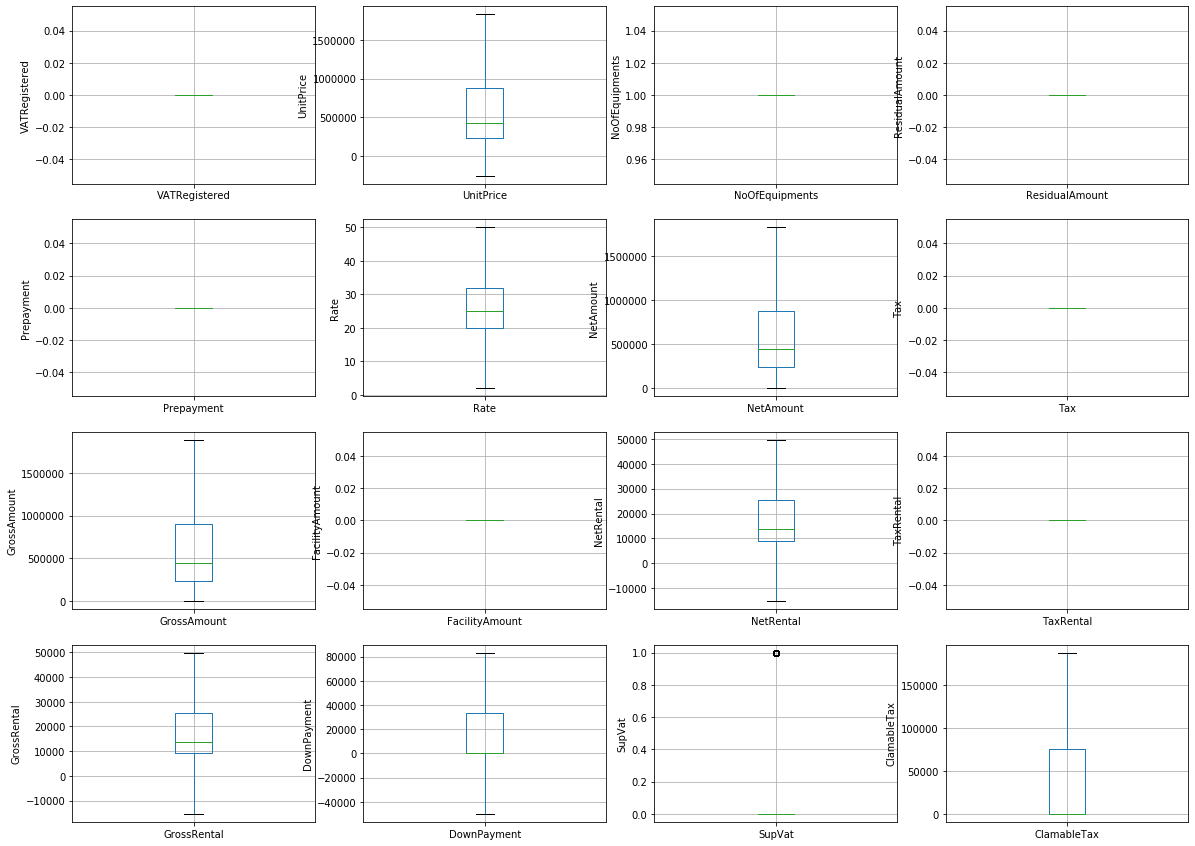

In [29]:
#After removing outliers
plt.figure(figsize=(20,15))
plt.subplot(4, 4, 1)
fig = df2.boxplot(column='VATRegistered')
fig.set_title('')
fig.set_ylabel('VATRegistered')


plt.subplot(4, 4, 2)
fig = df2.boxplot(column='UnitPrice')
fig.set_title('')
fig.set_ylabel('UnitPrice')

plt.subplot(4, 4, 3)
fig = df2.boxplot(column='NoOfEquipments')
fig.set_title('')
fig.set_ylabel('NoOfEquipments')

plt.subplot(4, 4, 4)
fig = df2.boxplot(column='ResidualAmount')
fig.set_title('')
fig.set_ylabel('ResidualAmount')


plt.subplot(4, 4, 5)
fig = df2.boxplot(column='Prepayment')
fig.set_title('')
fig.set_ylabel('Prepayment')

plt.subplot(4, 4, 6)
fig = df2.boxplot(column='Rate')
fig.set_title('')
fig.set_ylabel('Rate')

plt.subplot(4, 4, 7)
fig = df2.boxplot(column='NetAmount')
fig.set_title('')
fig.set_ylabel('NetAmount')

plt.subplot(4, 4, 8)
fig = df2.boxplot(column='Tax')
fig.set_title('')
fig.set_ylabel('Tax')

plt.subplot(4, 4, 9)
fig = df2.boxplot(column='GrossAmount')
fig.set_title('')
fig.set_ylabel('GrossAmount')


plt.subplot(4, 4, 10)
fig = df2.boxplot(column='FacilityAmount')
fig.set_title('')
fig.set_ylabel('FacilityAmount')

plt.subplot(4, 4, 11)
fig = df2.boxplot(column='NetRental')
fig.set_title('')
fig.set_ylabel('NetRental')

plt.subplot(4, 4, 12)
fig = df2.boxplot(column='TaxRental')
fig.set_title('')
fig.set_ylabel('TaxRental')

plt.subplot(4, 4, 13)
fig = df2.boxplot(column='GrossRental')
fig.set_title('')
fig.set_ylabel('GrossRental')
                 
plt.subplot(4, 4, 14)
fig = df2.boxplot(column='DownPayment')
fig.set_title('')
fig.set_ylabel('DownPayment')

plt.subplot(4, 4, 15)
fig = df2.boxplot(column='SupVat')
fig.set_title('')
fig.set_ylabel('SupVat')
                 
plt.subplot(4, 4, 16)
fig = df2.boxplot(column='ClamableTax')
fig.set_title('')
fig.set_ylabel('ClamableTax')


# Dealing with Categorical Variables

In [30]:
for var in categorical:
 print(var, ' contains ', len(df2[var].unique()), ' labels') 

FacilityType  contains  27  labels
SchemType  contains  3  labels
EquipmentCode  contains  89  labels
Period  contains  249  labels
Rentals  contains  5  labels
ResidualType  contains  4  labels
PrePayType  contains  2  labels
RTCode  contains  4  labels
NetRecievable  contains  319628  labels
FlatRate  contains  154726  labels
UserID  contains  3573  labels
SysDate  contains  36000  labels


In [31]:
#Deleting UserID and SysDate from the data set as UserID 
del df2['UserID']
del df2['SysDate']
df2.head()

,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Period,Rentals,ResidualType,ResidualAmount,...,FacilityAmount,NetRental,TaxRental,GrossRental,DownPayment,NetRecievable,FlatRate,SupVat,ClamableTax,Status
0,M,0.0,N,31,700000.0,1.0,36,0,N,0.0,...,0.0,32063.0,0.0,32063.0,0.0,1154268,21.6318,0.0,0.0,1
1,M,0.0,N,31,100000.0,1.0,48,0,N,0.0,...,0.0,4081.0,0.0,4081.0,0.0,195888,23.972,0.0,0.0,1
2,M,0.0,N,31,800000.0,1.0,48,0,N,0.0,...,0.0,29743.0,0.0,29743.0,0.0,1427664,19.6145,0.0,0.0,1
3,M,0.0,N,31,1828250.0,1.0,48,0,N,0.0,...,0.0,49599.5,0.0,49899.5,0.0,13298160,22.4934,0.0,0.0,1
4,M,0.0,N,31,300000.0,1.0,36,0,N,0.0,...,0.0,13742.0,0.0,13742.0,0.0,494712,21.6347,0.0,0.0,1


In [32]:
categorical2 = [var for var in df2.columns if df2[var].dtype=='O']
categorical2

['FacilityType',
 'SchemType',
 'EquipmentCode',
 'Period',
 'Rentals',
 'ResidualType',
 'PrePayType',
 'RTCode',
 'NetRecievable',
 'FlatRate']

In [33]:
for var in categorical2:
 print(var, ' contains ', len(df2[var].unique()), ' labels') 

FacilityType  contains  27  labels
SchemType  contains  3  labels
EquipmentCode  contains  89  labels
Period  contains  249  labels
Rentals  contains  5  labels
ResidualType  contains  4  labels
PrePayType  contains  2  labels
RTCode  contains  4  labels
NetRecievable  contains  319628  labels
FlatRate  contains  154726  labels


In [34]:
df2.FacilityType.unique()

array(['M', 'L', 'H', 'I', 'J', 'V', 'Q', 'P', 'X', 'Z', 'U', 'A', 'F',
       'G', 'N', 'R', '2', '1', 'S', 'W', 'B', '4', '3', '5', 'K', '8',
       'Y'], dtype=object)

In [35]:
df2.SchemType.unique()

array(['N', 'S', 'C'], dtype=object)

In [36]:
df2.EquipmentCode.unique()

array([31, 4, 1, 24, 23, 16, 26, 19, 22, 18, 20, 21, 13, 14, 5, 6, 17, 25,
       3, 7, 2, 11, 8, 12, 27, 29, 30, 9, 33, 34, 35, 10, 36, '6', '11',
       '29', '30', '5', '4', '31', '27', '3', '33', '21', '7', '36', '8',
       '9', '19', '35', '1', '2', '13', '14', '22', '65', '10', '24',
       '18', '2001', '23', '17', '16', '51', '12', '40', '34', '32', '25',
       '28', '37', 2001, 37, 65, 40, 51, 32, '20', '45', 45.0, 42.0, 44.0,
       43, 46, '42', '46', '44', '43', 28.0], dtype=object)

In [37]:
df2.Period.unique()

array([36, 48, 60, 30, 4, 3, 17, 19, 20, 23, 11, 24, 25, 13, 26, 27, 15,
       16, 28, 29, 6, 12, 18, 42, 40, 46, 39, 50, 31, 49, 55, 37, 54, 38,
       34, 61, 59, 97, 43, 57, 62, 22, 7, 47, 63, 72, 58, 52, 73, 41, 84,
       33, 32, 35, 14, 21, 71, 53, 45, 8, 44, 96, 51, 2, 10, 92, 9, 1, 5,
       85, 56, 66, 80, 67, 100, '31', '48', '37', '25', '19', '60', '36',
       '54', '61', '49', '4', '59', '100', '55', '13', '43', '18', '12',
       '30', '24', '35', '42', '28', '17', '14', '96', '1', '32', '46',
       '41', '20', '45', '7', '21', '40', '6', '38', '90', '16', '15',
       '58', '8', '44', '50', '57', '34', '33', '3', '10', '29', '47',
       '52', '56', '22', '84', '72', '73', '53', '23', '39', '64', '120',
       '5', '27', '11', '26', '66', '77', '62', '91', '95', '93', '97',
       '51', '67', '9', '180', '117', '99', '81', '78', 90, 87, 120, 119,
       70, 115, 240, 180, 108, 68, 113, 76, 210, 91, 107, 114, 118, 117,
       116, 65, 89, 112, 111, 77, '113', '144', '94

In [38]:
 df2.Rentals.unique()

array([0, 1, '1', '0', ' '], dtype=object)

In [39]:
df2.ResidualType.unique()

array(['N', 'G', 'U', ' '], dtype=object)

In [40]:
df2.PrePayType.unique() 

array(['R', 'A'], dtype=object)

In [41]:
df2.RTCode.unique() 

array([1, 2, '1', '2'], dtype=object)

In [42]:
df2.NetRecievable.unique() 

array([1154268, 195888, 1427664, ..., 21600000.0, 15068820.0, 16216320.0],
      dtype=object)

In [43]:
df2.FlatRate.unique()

array([21.6318, 23.971999999999998, 19.6145, ..., 10.0328, 3.0722, 3.0758],
      dtype=object)

# Converting the data type to float of some categorical variables

In [44]:
df2['Period_New']=df2['Period'].astype(float)
df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Period,Rentals,ResidualType,ResidualAmount,...,NetRental,TaxRental,GrossRental,DownPayment,NetRecievable,FlatRate,SupVat,ClamableTax,Status,Period_New
0,M,0.0,N,31,700000.0,1.0,36,0,N,0.0,...,32063.0,0.0,32063.0,0.0,1154268,21.6318,0.0,0.0,1,36.0
1,M,0.0,N,31,100000.0,1.0,48,0,N,0.0,...,4081.0,0.0,4081.0,0.0,195888,23.972,0.0,0.0,1,48.0
2,M,0.0,N,31,800000.0,1.0,48,0,N,0.0,...,29743.0,0.0,29743.0,0.0,1427664,19.6145,0.0,0.0,1,48.0
3,M,0.0,N,31,1828250.0,1.0,48,0,N,0.0,...,49599.5,0.0,49899.5,0.0,13298160,22.4934,0.0,0.0,1,48.0
4,M,0.0,N,31,300000.0,1.0,36,0,N,0.0,...,13742.0,0.0,13742.0,0.0,494712,21.6347,0.0,0.0,1,36.0


In [45]:
df2['NetRecievable_new']=df2['NetRecievable'].astype(float)
df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Period,Rentals,ResidualType,ResidualAmount,...,TaxRental,GrossRental,DownPayment,NetRecievable,FlatRate,SupVat,ClamableTax,Status,Period_New,NetRecievable_new
0,M,0.0,N,31,700000.0,1.0,36,0,N,0.0,...,0.0,32063.0,0.0,1154268,21.6318,0.0,0.0,1,36.0,1154268.0
1,M,0.0,N,31,100000.0,1.0,48,0,N,0.0,...,0.0,4081.0,0.0,195888,23.972,0.0,0.0,1,48.0,195888.0
2,M,0.0,N,31,800000.0,1.0,48,0,N,0.0,...,0.0,29743.0,0.0,1427664,19.6145,0.0,0.0,1,48.0,1427664.0
3,M,0.0,N,31,1828250.0,1.0,48,0,N,0.0,...,0.0,49899.5,0.0,13298160,22.4934,0.0,0.0,1,48.0,13298160.0
4,M,0.0,N,31,300000.0,1.0,36,0,N,0.0,...,0.0,13742.0,0.0,494712,21.6347,0.0,0.0,1,36.0,494712.0


In [46]:
df2['FlatRate_new']=df2['FlatRate'].astype(float)
df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Period,Rentals,ResidualType,ResidualAmount,...,GrossRental,DownPayment,NetRecievable,FlatRate,SupVat,ClamableTax,Status,Period_New,NetRecievable_new,FlatRate_new
0,M,0.0,N,31,700000.0,1.0,36,0,N,0.0,...,32063.0,0.0,1154268,21.6318,0.0,0.0,1,36.0,1154268.0,21.6318
1,M,0.0,N,31,100000.0,1.0,48,0,N,0.0,...,4081.0,0.0,195888,23.972,0.0,0.0,1,48.0,195888.0,23.9720
2,M,0.0,N,31,800000.0,1.0,48,0,N,0.0,...,29743.0,0.0,1427664,19.6145,0.0,0.0,1,48.0,1427664.0,19.6145
3,M,0.0,N,31,1828250.0,1.0,48,0,N,0.0,...,49899.5,0.0,13298160,22.4934,0.0,0.0,1,48.0,13298160.0,22.4934
4,M,0.0,N,31,300000.0,1.0,36,0,N,0.0,...,13742.0,0.0,494712,21.6347,0.0,0.0,1,36.0,494712.0,21.6347


In [47]:
#Deleting the previous colums 
del df2['Period']
del df2['NetRecievable']
del df2['FlatRate']
df2.head()

,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Rentals,ResidualType,ResidualAmount,PrePayType,...,NetRental,TaxRental,GrossRental,DownPayment,SupVat,ClamableTax,Status,Period_New,NetRecievable_new,FlatRate_new
0,M,0.0,N,31,700000.0,1.0,0,N,0.0,R,...,32063.0,0.0,32063.0,0.0,0.0,0.0,1,36.0,1154268.0,21.6318
1,M,0.0,N,31,100000.0,1.0,0,N,0.0,R,...,4081.0,0.0,4081.0,0.0,0.0,0.0,1,48.0,195888.0,23.9720
2,M,0.0,N,31,800000.0,1.0,0,N,0.0,R,...,29743.0,0.0,29743.0,0.0,0.0,0.0,1,48.0,1427664.0,19.6145
3,M,0.0,N,31,1828250.0,1.0,0,N,0.0,R,...,49599.5,0.0,49899.5,0.0,0.0,0.0,1,48.0,13298160.0,22.4934
4,M,0.0,N,31,300000.0,1.0,0,N,0.0,R,...,13742.0,0.0,13742.0,0.0,0.0,0.0,1,36.0,494712.0,21.6347


# Encoding the remaining Categorical Variables

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["Encoded FacilityType"] = le.fit_transform(df2['FacilityType'])
df2["Encoded SchemType"] = le.fit_transform(df2['SchemType'])
df2["Encoded ResidualType"] = le.fit_transform(df2['ResidualType'])
df2["Encoded PrePayType"] = le.fit_transform(df2['PrePayType'])

df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

,FacilityType,VATRegistered,SchemType,EquipmentCode,UnitPrice,NoOfEquipments,Rentals,ResidualType,ResidualAmount,PrePayType,...,SupVat,ClamableTax,Status,Period_New,NetRecievable_new,FlatRate_new,Encoded FacilityType,Encoded SchemType,Encoded ResidualType,Encoded PrePayType
0,M,0.0,N,31,700000.0,1.0,0,N,0.0,R,...,0.0,0.0,1,36.0,1154268.0,21.6318,15,1,2,1
1,M,0.0,N,31,100000.0,1.0,0,N,0.0,R,...,0.0,0.0,1,48.0,195888.0,23.9720,15,1,2,1
2,M,0.0,N,31,800000.0,1.0,0,N,0.0,R,...,0.0,0.0,1,48.0,1427664.0,19.6145,15,1,2,1
3,M,0.0,N,31,1828250.0,1.0,0,N,0.0,R,...,0.0,0.0,1,48.0,13298160.0,22.4934,15,1,2,1
4,M,0.0,N,31,300000.0,1.0,0,N,0.0,R,...,0.0,0.0,1,36.0,494712.0,21.6347,15,1,2,1


In [49]:
#deleting previous columns after encoding
del df2['FacilityType']
del df2['SchemType']
del df2['ResidualType']
del df2['PrePayType']
df2.head()


,VATRegistered,EquipmentCode,UnitPrice,NoOfEquipments,Rentals,ResidualAmount,Prepayment,Rate,RTCode,NetAmount,...,SupVat,ClamableTax,Status,Period_New,NetRecievable_new,FlatRate_new,Encoded FacilityType,Encoded SchemType,Encoded ResidualType,Encoded PrePayType
0,0.0,31,700000.0,1.0,0,0.0,0.0,36.0,1,700000.0,...,0.0,0.0,1,36.0,1154268.0,21.6318,15,1,2,1
1,0.0,31,100000.0,1.0,0,0.0,0.0,38.0,1,100000.0,...,0.0,0.0,1,48.0,195888.0,23.9720,15,1,2,1
2,0.0,31,800000.0,1.0,0,0.0,0.0,32.0,1,800000.0,...,0.0,0.0,1,48.0,1427664.0,19.6145,15,1,2,1
3,0.0,31,1828250.0,1.0,0,0.0,0.0,36.0,1,1832952.5,...,0.0,0.0,1,48.0,13298160.0,22.4934,15,1,2,1
4,0.0,31,300000.0,1.0,0,0.0,0.0,36.0,1,300000.0,...,0.0,0.0,1,36.0,494712.0,21.6347,15,1,2,1


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["Encoded RTCode"] = le.fit_transform(df2['RTCode'].astype(str))
df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,VATRegistered,EquipmentCode,UnitPrice,NoOfEquipments,Rentals,ResidualAmount,Prepayment,Rate,RTCode,NetAmount,...,ClamableTax,Status,Period_New,NetRecievable_new,FlatRate_new,Encoded FacilityType,Encoded SchemType,Encoded ResidualType,Encoded PrePayType,Encoded RTCode
0,0.0,31,700000.0,1.0,0,0.0,0.0,36.0,1,700000.0,...,0.0,1,36.0,1154268.0,21.6318,15,1,2,1,0
1,0.0,31,100000.0,1.0,0,0.0,0.0,38.0,1,100000.0,...,0.0,1,48.0,195888.0,23.9720,15,1,2,1,0
2,0.0,31,800000.0,1.0,0,0.0,0.0,32.0,1,800000.0,...,0.0,1,48.0,1427664.0,19.6145,15,1,2,1,0
3,0.0,31,1828250.0,1.0,0,0.0,0.0,36.0,1,1832952.5,...,0.0,1,48.0,13298160.0,22.4934,15,1,2,1,0
4,0.0,31,300000.0,1.0,0,0.0,0.0,36.0,1,300000.0,...,0.0,1,36.0,494712.0,21.6347,15,1,2,1,0


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["Encoded EquipmentCode"] = le.fit_transform(df2['EquipmentCode'].astype(str))
df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,VATRegistered,EquipmentCode,UnitPrice,NoOfEquipments,Rentals,ResidualAmount,Prepayment,Rate,RTCode,NetAmount,...,Status,Period_New,NetRecievable_new,FlatRate_new,Encoded FacilityType,Encoded SchemType,Encoded ResidualType,Encoded PrePayType,Encoded RTCode,Encoded EquipmentCode
0,0.0,31,700000.0,1.0,0,0.0,0.0,36.0,1,700000.0,...,1,36.0,1154268.0,21.6318,15,1,2,1,0,46
1,0.0,31,100000.0,1.0,0,0.0,0.0,38.0,1,100000.0,...,1,48.0,195888.0,23.9720,15,1,2,1,0,46
2,0.0,31,800000.0,1.0,0,0.0,0.0,32.0,1,800000.0,...,1,48.0,1427664.0,19.6145,15,1,2,1,0,46
3,0.0,31,1828250.0,1.0,0,0.0,0.0,36.0,1,1832952.5,...,1,48.0,13298160.0,22.4934,15,1,2,1,0,46
4,0.0,31,300000.0,1.0,0,0.0,0.0,36.0,1,300000.0,...,1,36.0,494712.0,21.6347,15,1,2,1,0,46


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["Encoded Rentals"] = le.fit_transform(df2['Rentals'].astype(str))
df2.head()

C:\Users\Thusitha\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,VATRegistered,EquipmentCode,UnitPrice,NoOfEquipments,Rentals,ResidualAmount,Prepayment,Rate,RTCode,NetAmount,...,Period_New,NetRecievable_new,FlatRate_new,Encoded FacilityType,Encoded SchemType,Encoded ResidualType,Encoded PrePayType,Encoded RTCode,Encoded EquipmentCode,Encoded Rentals
0,0.0,31,700000.0,1.0,0,0.0,0.0,36.0,1,700000.0,...,36.0,1154268.0,21.6318,15,1,2,1,0,46,1
1,0.0,31,100000.0,1.0,0,0.0,0.0,38.0,1,100000.0,...,48.0,195888.0,23.9720,15,1,2,1,0,46,1
2,0.0,31,800000.0,1.0,0,0.0,0.0,32.0,1,800000.0,...,48.0,1427664.0,19.6145,15,1,2,1,0,46,1
3,0.0,31,1828250.0,1.0,0,0.0,0.0,36.0,1,1832952.5,...,48.0,13298160.0,22.4934,15,1,2,1,0,46,1
4,0.0,31,300000.0,1.0,0,0.0,0.0,36.0,1,300000.0,...,36.0,494712.0,21.6347,15,1,2,1,0,46,1


In [53]:
#Deleting the previous columns after encoding
del df2['RTCode']
del df2['EquipmentCode']
del df2['Rentals']
df2.head()

,VATRegistered,UnitPrice,NoOfEquipments,ResidualAmount,Prepayment,Rate,NetAmount,Tax,GrossAmount,FacilityAmount,...,Period_New,NetRecievable_new,FlatRate_new,Encoded FacilityType,Encoded SchemType,Encoded ResidualType,Encoded PrePayType,Encoded RTCode,Encoded EquipmentCode,Encoded Rentals
0,0.0,700000.0,1.0,0.0,0.0,36.0,700000.0,0.0,700000.0,0.0,...,36.0,1154268.0,21.6318,15,1,2,1,0,46,1
1,0.0,100000.0,1.0,0.0,0.0,38.0,100000.0,0.0,100000.0,0.0,...,48.0,195888.0,23.9720,15,1,2,1,0,46,1
2,0.0,800000.0,1.0,0.0,0.0,32.0,800000.0,0.0,800000.0,0.0,...,48.0,1427664.0,19.6145,15,1,2,1,0,46,1
3,0.0,1828250.0,1.0,0.0,0.0,36.0,1832952.5,0.0,1887502.5,0.0,...,48.0,13298160.0,22.4934,15,1,2,1,0,46,1
4,0.0,300000.0,1.0,0.0,0.0,36.0,300000.0,0.0,300000.0,0.0,...,36.0,494712.0,21.6347,15,1,2,1,0,46,1


# Feature Selection

In [54]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

MemoryError: Unable to allocate 123. MiB for an array with shape (19, 851930) and data type float64

In [ ]:
del df2['VATRegistered']
del df2['NoOfEquipments']
del df2['ResidualAmount']
del df2['Prepayment']
del df2['Tax']
del df2['FacilityAmount']
del df2['TaxRental']

df2.head()

In [ ]:
del df2['NetRental']
del df2['GrossRental']
df2.head()

In [ ]:
df2.dtypes #Now all the variables are numerical

# Performing OverSampling and Cross Validation for better accuracy

# Over Sampling

In [ ]:
#Create independent and Dependent Features
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Status"]]
# Store the variable we are predicting 
target = "Status"
# Define a random state 
state = np.random.RandomState(42)
X = df2[columns]
Y = df2[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

# Visualizing the dependent variable distribution

In [ ]:
count_classes = pd.value_counts(df2['Status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Lease Status Distribution")

plt.xticks(range(2))

plt.xlabel("Status")

plt.ylabel("Frequency")


In [ ]:

## Get the Successful and the Unsuccessful dataset 

Successful = df2[df2['Status']==1]

Unsuccessful = df2[df2['Status']==0]

In [ ]:
print(Successful.shape,Unsuccessful.shape)

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
X_res.head()

In [ ]:
y_res.head()

In [ ]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
cross_val_score(rf_model,X_res,y_res,cv=5).mean()

In [ ]:
ada_model = AdaBoostClassifier()

In [ ]:
cross_val_score(ada_model,X_res,y_res,cv=5).mean()

In [ ]:
logit_model = LogisticRegression()

In [ ]:
cross_val_score(logit_model,X_res,y_res,cv=5).mean()

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
cross_val_score(xgb_model,X_res,y_res,cv=5).mean()

In [ ]:
knnclassifier = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knnclassifier,X_res,y_res,cv=5).mean()

In [ ]:
pd.pandas.set_option('display.max_columns', None)

In [ ]:

from sklearn.model_selection import train_test_split

from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,random_state =5)

In [ ]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(x_train) #  fit 

In [ ]:
xgb_model = xgb.XGBClassifier()

eval_set = [(x_test, y_test)]
xgb_model.fit(x_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(x_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(x_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
y_pred_proba1 = xgb_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

pred = logit_model.predict_proba(x_train)
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = logit_model.predict_proba(x_test)
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
y_pred_proba2 = logit_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

pred = rf_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
y_pred_proba3 = rf_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

pred = ada_model.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
y_pred_proba4 = ada_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba4)
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)

pred = knnclassifier.predict_proba(x_train)
print('knnclassifier train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = knnclassifier.predict_proba(x_test)
print('knnclassifier test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))




In [ ]:
y_pred_proba5 = knnclassifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba5)
auc = metrics.roc_auc_score(y_test, y_pred_proba5)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()